## 데이터 셋 내려받기

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

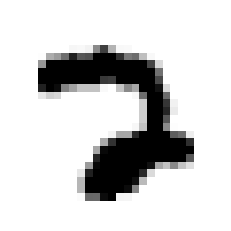

In [26]:
X,y = mnist['data'], mnist['target']
X.shape


# 그래프 
#한 레이블 보면서 어떤 그림인지 확인
import matplotlib.pyplot as plt

some_digit = X[120]
some_digit_images = some_digit.reshape(28,28)

plt.imshow(some_digit_images, cmap = 'binary')
plt.axis('off')
plt.show()


In [41]:
#레이블은 문자열이므로 y를 정수로 반환 하자
import numpy as np
y = y.astype(np.uint8)

In [42]:
#테스트셋 트레인 셋 분류 (데이터, 타겟)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 이진 분류기 훈련

In [43]:
y_train_5 = (y_train == 5) #5만 true 표시 나머지는 false
y_test_5 = (y_test == 5)

In [47]:
#sgd (확률적 경사하강법)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [53]:
sgd_clf.predict([some_digit])

array([False])

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [55]:
y_train_5

array([ True, False, False, ...,  True, False, False])